# This notebook is a graphical representation of Covid-19 cases.

Courtesy: European Centre for Disease Prevention and Control.

Importing libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [7]:
# created a global variable for DataFrame
ds = pd.DataFrame()

In [8]:
# to avoid multiple calls, we created this function
def GetDataFromFile():
    dataSet = pd.DataFrame()
    datestr = GetActiveDate(False)
    # url to call
    url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-' + datestr + '.xlsx'

    try:
        dataSet = pd.read_excel(url)
    except:
        # fetch data from the previous date
        datestr = GetActiveDate(True)
        url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-' + datestr + '.xlsx'
        dataSet = pd.read_excel(url)
    return dataSet

In [9]:
# Fetch data against the date
def GetActiveDate(minusDay):
    todaysDate = datetime.datetime.now()
    day = datetime.timedelta(days=1)
    yesterdaysDate = datetime.datetime.now() - day
    if minusDay == False:
        res = todaysDate.strftime('%Y-%m-%d')
    else:
        res = yesterdaysDate.strftime('%Y-%m-%d')
    return res

In [11]:
# fetch data and save it to the global variable
ds = GetDataFromFile()

In [43]:
def ShowData(country, searchType, graphVal,df):    
    #country : United_Arab_Emirates, Pakistan
    #searchType : data to show against the column. i.e cases, deaths
    # graphVal : y axis which indicates how far we can go for the value
    # df : DataFrame.

    # data to fetch against the specific country
    df = df[df['countriesAndTerritories'] == country]
    
     # if country has underscores then replace it with the space.
    country = country.replace('_', ' ')

    #Total cases OR deaths in any Country
    total_cases_deaths = df[searchType].sum()
    print('\033[1m' + 'Total '+ searchType +' in ' + country +' are: ' + str(total_cases_deaths))

    # sort all the dates from the excel file
    df = df.sort_values(['year', 'month', 'day'], ascending=[1, 1, 1])

    #concatenate the year-month-date into single column : ie 2020-06-24
    df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

    #graphdf is a data frame and a grouped version of the data
    graphdf = df.groupby([df['Date'].dt.month_name()], sort=False).sum()

    # create the list of the items. i.e list of cases OR deaths
    case_type = list(graphdf[searchType])
    fig = plt.figure()
    ax = fig.add_subplot(111)

 
    # just capitalize the first letter of either case or death
    searchType = searchType.capitalize()
    title =''
    if searchType == 'Cases':
        plt.plot(range(len(case_type)), case_type, marker='o', color='orange')
        title = 'Covid-19 cases in ' + country
    else:
        plt.plot(range(len(case_type)), case_type, marker='o', color='red')
        title = 'Overall Deaths caused by Covid-19 in ' + country

    plt.xticks(range(len(graphdf.index.values)), graphdf.index.values)  # Redefining x-axis labels

    # loop through cases OR deaths list object
    for i, v in enumerate(case_type):
        # i is an iterator
        # v is value of the list
        ax.text(i, v + 25, "%d" % v, ha="right")
    plt.ylim(-10, graphVal)
    plt.ylabel(searchType)
    plt.title(title)
    

Total cases in United Arab Emirates are: 47360


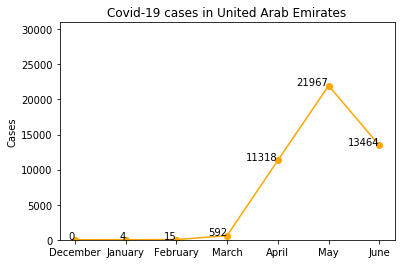

In [44]:
ShowData('United_Arab_Emirates', 'cases', 31000,ds)

Total deaths in United Arab Emirates are: 311


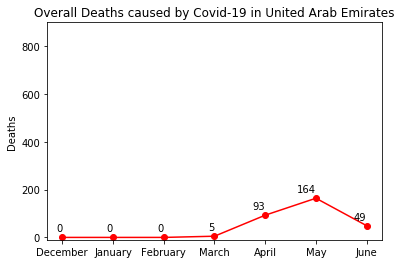

In [45]:
ShowData('United_Arab_Emirates', 'deaths', 900,ds)

Total cases in Pakistan are: 202955


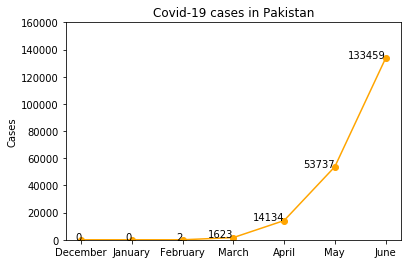

In [46]:
ShowData('Pakistan', 'cases', 160000,ds)

Total deaths in Pakistan are: 4118


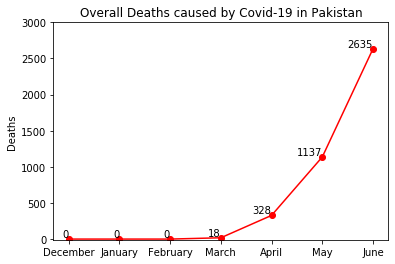

In [47]:
ShowData('Pakistan', 'deaths', 3000,ds)